In [1]:
import pandas as pd
import numpy as np
!pip install xgboost

DEPRECATION: Loading egg at /Users/soumitra7/anaconda3/lib/python3.11/site-packages/pyBWMD-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
df = pd.read_csv('final_dataset.csv')

In [3]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,01-01-2022 00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,01-01-2022 01:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,01-01-2022 02:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,01-01-2022 03:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,01-01-2022 04:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          5000 non-null   object 
 1   Temperature        5000 non-null   float64
 2   Humidity           5000 non-null   float64
 3   SquareFootage      5000 non-null   float64
 4   Occupancy          5000 non-null   int64  
 5   HVACUsage          5000 non-null   object 
 6   LightingUsage      5000 non-null   object 
 7   RenewableEnergy    5000 non-null   float64
 8   DayOfWeek          5000 non-null   object 
 9   Holiday            5000 non-null   object 
 10  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 429.8+ KB


In [5]:
df = df.drop(columns=['Timestamp', 'DayOfWeek'])

In [6]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,No,75.364373
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,No,83.401855
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,No,78.270888
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,No,56.519850
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,No,70.811732


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        5000 non-null   float64
 1   Humidity           5000 non-null   float64
 2   SquareFootage      5000 non-null   float64
 3   Occupancy          5000 non-null   int64  
 4   HVACUsage          5000 non-null   object 
 5   LightingUsage      5000 non-null   object 
 6   RenewableEnergy    5000 non-null   float64
 7   Holiday            5000 non-null   object 
 8   EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 351.7+ KB


In [8]:
# Assuming df is your original DataFrame

# Map categorical values to binary numbers
binary_mapping = {
    'HVACUsage': {'On': 1, 'Off': 0},
    'LightingUsage': {'On': 1, 'Off': 0},
    'Holiday': {'Yes': 1, 'No': 0}
}

# Apply mapping to each column
for column, mapping in binary_mapping.items():
    df[column] = df[column].map(mapping)
    
    


# Display the modified DataFrame
print(df)

      Temperature   Humidity  SquareFootage  Occupancy  HVACUsage  \
0       25.139433  43.431581    1565.693999          5          1   
1       27.731651  54.225919    1411.064918          1          1   
2       28.704277  58.907658    1755.715009          2          0   
3       20.080469  50.371637    1452.316318          1          0   
4       23.097359  51.401421    1094.130359          9          1   
...           ...        ...            ...        ...        ...   
4995    23.620000  35.520000    1352.120000          0          1   
4996    29.480000  40.870000    1805.050000          8          0   
4997    27.060000  48.630000    1364.160000          2          1   
4998    20.850000  38.010000    1025.740000          9          0   
4999    27.600000  30.190000    1755.550000          0          1   

      LightingUsage  RenewableEnergy  Holiday  EnergyConsumption  
0                 0         2.774699        0          75.364373  
1                 1        21.831384 

In [9]:
df_encoded= df
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        5000 non-null   float64
 1   Humidity           5000 non-null   float64
 2   SquareFootage      5000 non-null   float64
 3   Occupancy          5000 non-null   int64  
 4   HVACUsage          5000 non-null   int64  
 5   LightingUsage      5000 non-null   int64  
 6   RenewableEnergy    5000 non-null   float64
 7   Holiday            5000 non-null   int64  
 8   EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 351.7 KB


In [10]:

# Get correlation of each variable with respect to 'EnergyConsumption'
energy_consumption_correlation = df.corr()['EnergyConsumption']

# Display the correlation
print(energy_consumption_correlation)


Temperature          0.093354
Humidity            -0.007742
SquareFootage       -0.014401
Occupancy           -0.006275
HVACUsage            0.021038
LightingUsage        0.017025
RenewableEnergy      0.000669
Holiday              0.021639
EnergyConsumption    1.000000
Name: EnergyConsumption, dtype: float64


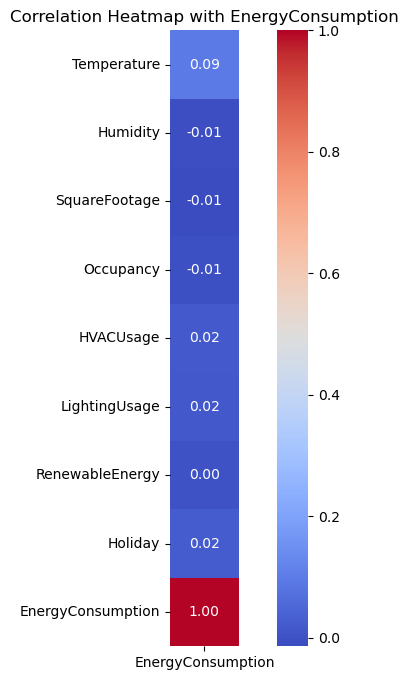

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Get correlation matrix
correlation_matrix = df.corr()

# Extract correlation of each variable with respect to 'EnergyConsumption'
energy_consumption_correlation = correlation_matrix['EnergyConsumption']

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(energy_consumption_correlation.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap with EnergyConsumption')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame

# Separate features (independent variables) and target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Create pipelines for each model
models = {
    "Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
    "SVR": make_pipeline(StandardScaler(), SVR()),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Model: {name}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model: Linear Regression
Root Mean Squared Error (RMSE): 11.89
Model: SVR
Root Mean Squared Error (RMSE): 11.97
Model: Random Forest
Root Mean Squared Error (RMSE): 12.31
Model: XGBoost
Root Mean Squared Error (RMSE): 12.96


In [14]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# Add more regression models to the dictionary
models.update({
    "Ridge Regression": make_pipeline(StandardScaler(), Ridge()),
    "Lasso Regression": make_pipeline(StandardScaler(), Lasso()),
    "KNeighborsRegressor": make_pipeline(StandardScaler(), KNeighborsRegressor()),
    "Decision Tree": DecisionTreeRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
})

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Model: {name}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model: Linear Regression
Root Mean Squared Error (RMSE): 11.89
Model: SVR
Root Mean Squared Error (RMSE): 11.97
Model: Random Forest
Root Mean Squared Error (RMSE): 12.24
Model: XGBoost
Root Mean Squared Error (RMSE): 12.96
Model: Ridge Regression
Root Mean Squared Error (RMSE): 11.89
Model: Lasso Regression
Root Mean Squared Error (RMSE): 11.97
Model: KNeighborsRegressor
Root Mean Squared Error (RMSE): 13.56
Model: Decision Tree
Root Mean Squared Error (RMSE): 17.35
Model: AdaBoost
Root Mean Squared Error (RMSE): 11.94
Model: Gradient Boosting
Root Mean Squared Error (RMSE): 11.94


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV  # Add this line for GridSearchCV

# Define the model
gb = GradientBoostingRegressor()

# Define hyperparameters for tuning
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Grid search with cross-validation
grid_gb = GridSearchCV(gb, params, cv=5)
grid_gb.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters for Gradient Boosting:", grid_gb.best_params_)

Best hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model with best hyperparameters
best_gb_model = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=100)

# Train the model
best_gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = best_gb_model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print("Root Mean Squared Error (GB):", rmse_gb)

Root Mean Squared Error (GB): 11.899588747913125


In [18]:
from sklearn.ensemble import AdaBoostRegressor

# Define the model
ada = AdaBoostRegressor()

# Define hyperparameters for tuning
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Grid search with cross-validation
grid_ada = GridSearchCV(ada, params, cv=5)
grid_ada.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters for AdaBoost:", grid_ada.best_params_)

Best hyperparameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}


In [19]:
from sklearn.ensemble import AdaBoostRegressor

# Define the model with best hyperparameters
best_ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.01)

# Train the model
best_ada_model.fit(X_train, y_train)

# Make predictions
y_pred_ada = best_ada_model.predict(X_test)

In [20]:
# Calculate RMSE
rmse_ada = mean_squared_error(y_test, y_pred_ada, squared=False)
print("Root Mean Squared Error (AdaBoost):", rmse_ada)

Root Mean Squared Error (AdaBoost): 11.887177394736387


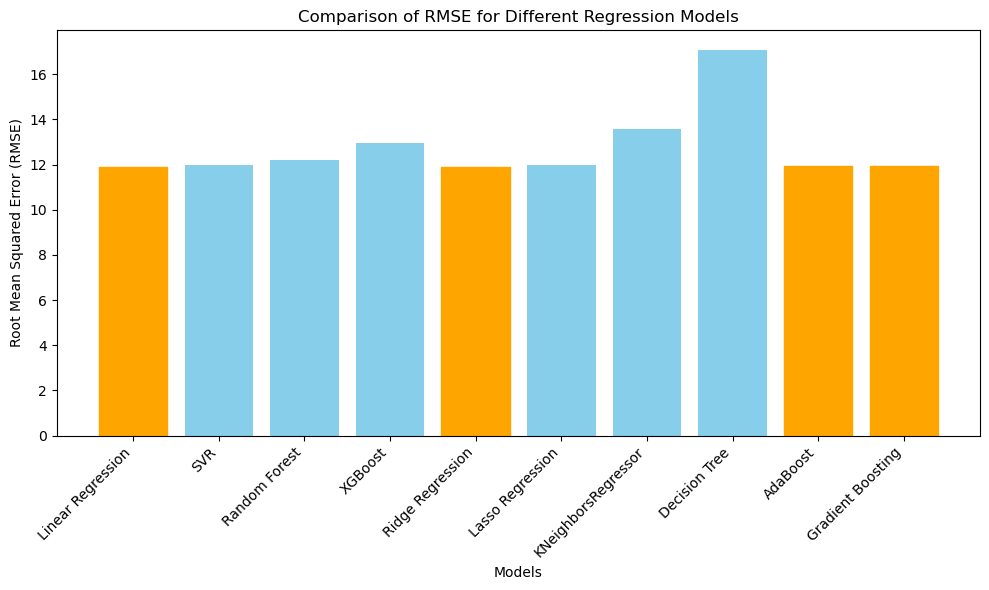

In [21]:
import numpy as np

# Define models and their corresponding RMSE values
models = [
    "Linear Regression", "SVR", "Random Forest", "XGBoost",
    "Ridge Regression", "Lasso Regression",
    "KNeighborsRegressor", "Decision Tree", "AdaBoost", "Gradient Boosting"
]
rmse_values = [11.89, 11.97, 12.22, 12.96, 11.89, 11.97, 13.56, 17.09, 11.95, 11.94]

# Find indices of three lowest RMSE values
lowest_indices = np.argsort(rmse_values)[:4]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_values, color='skyblue')

# Highlight the three lowest RMSE bars
for index in lowest_indices:
    bars[index].set_color('orange')

plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE for Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the Ridge Regression model
ridge = Ridge()

# Define hyperparameters for tuning
params = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}  # Example alpha values to try

# Grid search with cross-validation
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train, y_train)

# Best hyperparameters
best_alpha = grid_ridge.best_params_['alpha']
print("Best alpha for Ridge Regression:", best_alpha)

# Build the Ridge Regression model with the best hyperparameters
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

Best alpha for Ridge Regression: 10.0


Ridge(alpha=10.0)

In [23]:
from sklearn.metrics import mean_squared_error

y_pred_ridge = best_ridge_model.predict(X_test)
# Calculate RMSE for Ridge Regression
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("Root Mean Squared Error (Ridge Regression):", rmse_ridge)

Root Mean Squared Error (Ridge Regression): 11.888501249545612


In [24]:
# Predicted values for Ridge Regression
y_pred_ridge = best_ridge_model.predict(X_test)

# Predicted values for AdaBoost
y_pred_ada = best_ada_model.predict(X_test)

# Predicted values for Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test)

In [25]:
import pandas as pd

# Create a DataFrame to store actual and predicted values
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted (Ridge)": y_pred_ridge,
    "Predicted (AdaBoost)": y_pred_ada,
    "Predicted (Gradient Boosting)": y_pred_gb
})

# Reset index starting from 0
results.reset_index(drop=True, inplace=True)

# Display the DataFrame
results.head()


,Actual,Predicted (Ridge),Predicted (AdaBoost),Predicted (Gradient Boosting)
0,79.930000,75.600871,76.316679,76.263677
1,70.770000,75.249722,75.287108,75.595468
2,72.000000,75.645414,75.276160,75.595468
3,77.180000,76.058828,76.736041,76.417251
4,75.312838,75.774301,75.276160,75.608736


# Now we have selected Ridge Regression as its RMSE value is the lowest.

In [26]:
import numpy as np

def predict_energy_consumption(temp, humidity, square_footage, occupancy, hvac_usage, lighting_usage, renewable_energy, day_of_week, holiday):
    # Check if categorical variables are within specified unique values and encode them
    hvac_encoded = 1 if hvac_usage == 'On' else 0
    lighting_encoded = 1 if lighting_usage == 'On' else 0
    holiday_encoded = 1 if holiday == 'Yes' else 0
    
    # Check if numerical variables are non-negative
    if temp < 0 or humidity < 0 or square_footage < 0 or occupancy < 0 or renewable_energy < 0:
        print("Invalid input for numerical variables. Values must be non-negative.")
        return None
    
    # Apply Ridge Regression model to predict energy consumption
    X = np.array([[temp, humidity, square_footage, occupancy, hvac_encoded, lighting_encoded, renewable_energy, holiday_encoded]])
    energy_consumption = best_ridge_model.predict(X)[0]
    
    # Calculate cost based on predicted energy consumption
    cost = energy_consumption * 0.17  # $1 per unit of energy consumption
    
    return energy_consumption, cost

# Example usage:
temp = 25
humidity = 60
square_footage = 1000
occupancy = 5
hvac_usage = 'On'
lighting_usage = 'Off'
renewable_energy = 20
day_of_week = 'Monday'
holiday = 'No'

energy_consumption, cost = predict_energy_consumption(temp, humidity, square_footage, occupancy, hvac_usage, lighting_usage, renewable_energy, day_of_week, holiday)
print("Predicted Energy Consumption:", energy_consumption)
print("Cost:", cost)

Predicted Energy Consumption: 76.19492225551312
Cost: 12.953136783437232


/Users/soumitra7/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [27]:
def predict_target_variable(X_test, best_ridge_model):
    # Predict target variable using the Ridge Regression model
    y_pred = best_ridge_model.predict(X_test)
    return y_pred

# Example usage:
# Assuming X_test is a pandas DataFrame containing the features used for prediction
y_pred = predict_target_variable(X_test, best_ridge_model)
y_pred

array([75.60087073, 75.24972213, 75.64541391, 76.05882825, 75.77430114,
       74.21881661, 76.77363768, 73.61694448, 75.59026   , 77.89235707,
       77.28059966, 76.67125396, 76.51511847, 75.75655756, 77.88976763,
       76.40529898, 76.39345032, 77.81166311, 74.02665291, 76.53963242,
       76.83742522, 77.20980526, 77.82479878, 76.05111572, 74.82057296,
       75.13742646, 78.28461038, 77.09756031, 76.77678468, 77.1813039 ,
       76.73665859, 76.31281331, 76.59590899, 75.09570725, 75.5343879 ,
       78.18184961, 76.78587038, 74.5199309 , 77.54401772, 77.0819718 ,
       76.39883529, 75.47012543, 75.63796666, 74.78695675, 76.25685831,
       73.7844422 , 76.12284198, 75.76681225, 75.55016843, 77.56409632,
       75.70315413, 78.30001855, 77.96353401, 78.14560395, 77.1166628 ,
       75.35565082, 75.58532286, 76.8557659 , 75.67918583, 78.25335845,
       76.82441936, 77.52320574, 76.46270222, 75.86411049, 76.86337296,
       77.43274083, 76.99208835, 75.20654388, 76.4701428 , 78.22

In [28]:
# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['EnergyConsumption'])
y_pred_df.head()

,EnergyConsumption
0,75.600871
1,75.249722
2,75.645414
3,76.058828
4,75.774301


In [32]:
import pandas as pd

# Assuming y_pred contains your predicted values
y_pred_df = pd.DataFrame(y_pred, columns=['EnergyConsumption'])

# Concatenate X_test and y_pred_df
X_test_with_y_pred = pd.concat([X_test.reset_index(drop=True), y_pred_df], axis=1)

X_test_with_y_pred.head()


,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption
0,25.44000,54.170000,1483.630000,5,0,0,25.810000,1,75.600871
1,20.33000,43.770000,1448.990000,5,1,1,5.380000,1,75.249722
2,22.00000,39.590000,1885.050000,2,1,1,18.690000,0,75.645414
3,25.96000,33.040000,1409.610000,4,0,0,14.150000,1,76.058828
4,21.63769,56.532159,1235.612294,4,1,1,3.081125,0,75.774301


# Now we have to multiply the energy consumption by 0.17cents to find the unit price



In [35]:
# Multiply energy consumption by 0.17 cents to find the unit price
X_test_with_y_pred['UnitPrice'] = X_test_with_y_pred['EnergyConsumption'] * 0.17

# Display the DataFrame with the new 'UnitPrice' column
X_test_with_y_pred.head()


,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,UnitPrice
0,25.44000,54.170000,1483.630000,5,0,0,25.810000,1,75.600871,12.852148
1,20.33000,43.770000,1448.990000,5,1,1,5.380000,1,75.249722,12.792453
2,22.00000,39.590000,1885.050000,2,1,1,18.690000,0,75.645414,12.859720
3,25.96000,33.040000,1409.610000,4,0,0,14.150000,1,76.058828,12.930001
4,21.63769,56.532159,1235.612294,4,1,1,3.081125,0,75.774301,12.881631
